In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('census_income.csv')

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [6]:
31041/32560

0.9533476658476658

In [7]:
29849/32560

0.9167383292383292

In [8]:
data=data.drop(columns=['Capital_gain','Capital_loss'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Hours_per_week  32560 non-null  int64 
 11  Native_country  32560 non-null  object
 12  Income          32560 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [10]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
data_num=data.describe()
data_num

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


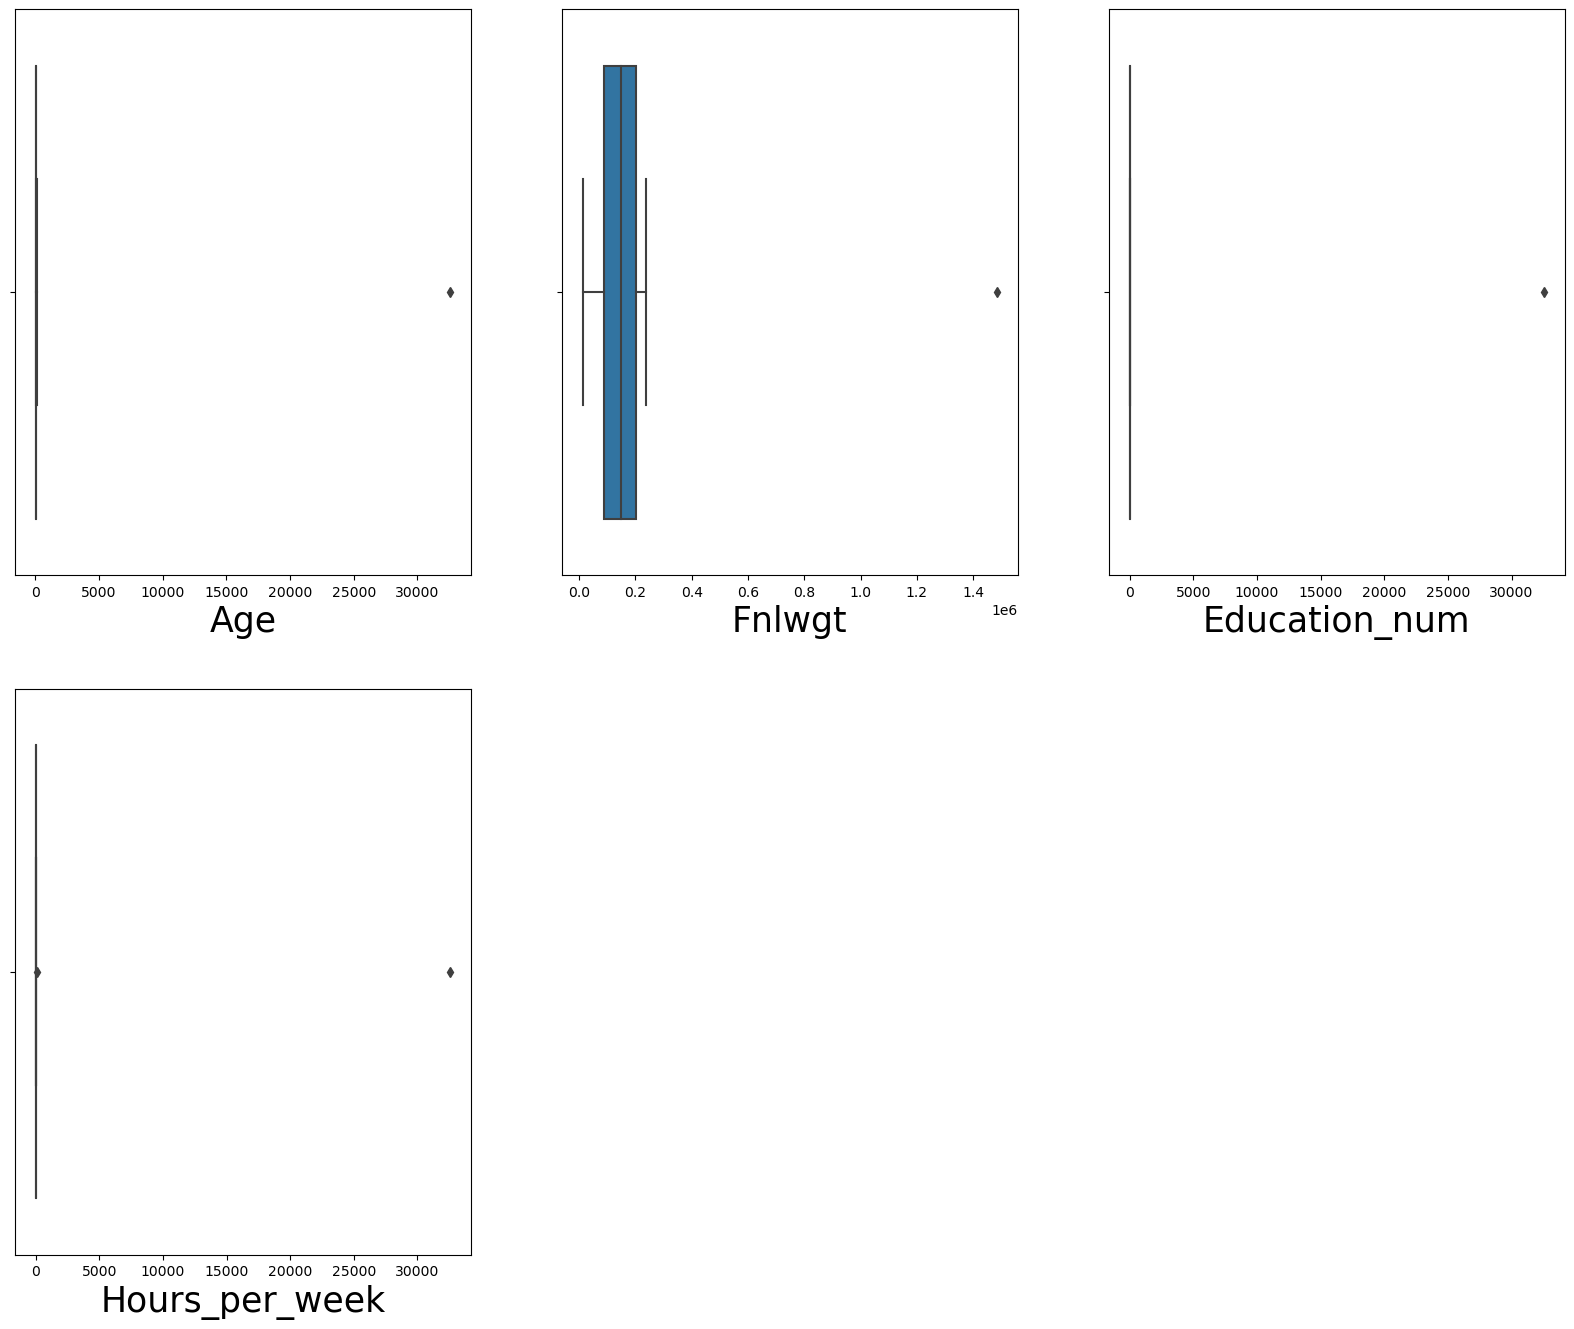

In [12]:
plt.figure(figsize=(20,25))
plot=1
for i in data_num.columns:
    if plot<=10:
        ax=plt.subplot(3,3,plot)
        sns.boxplot(data_num[i])
        plt.xlabel(i,fontsize=25)
    plot+=1
plt.show()

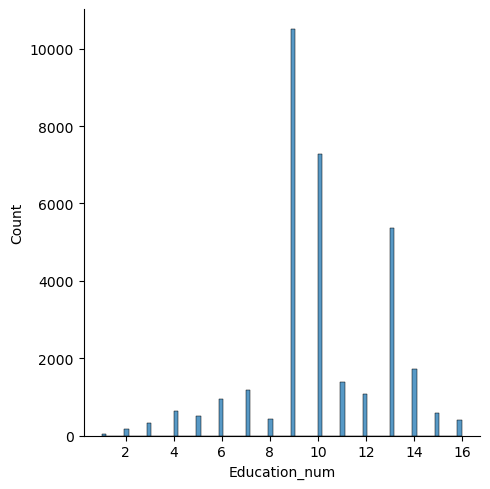

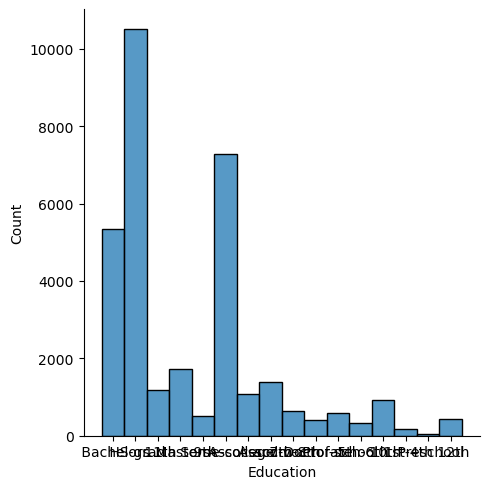

In [13]:
for i in data['Education_num'],data['Education']:
    print(sns.displot(i))

In [14]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1
iqr

Age                   20.0
Fnlwgt            119223.0
Education_num          3.0
Hours_per_week         5.0
dtype: float64

In [15]:
a_h=q3.Age+(1.5*iqr.Age)
ind_num=np.where(a_h<data['Age'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(32417, 13)

In [16]:
Fnlwgt_h=q3.Fnlwgt+(1.5*iqr.Fnlwgt)
ind_num=np.where(Fnlwgt_h<data['Fnlwgt'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(31426, 13)

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [18]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))
    

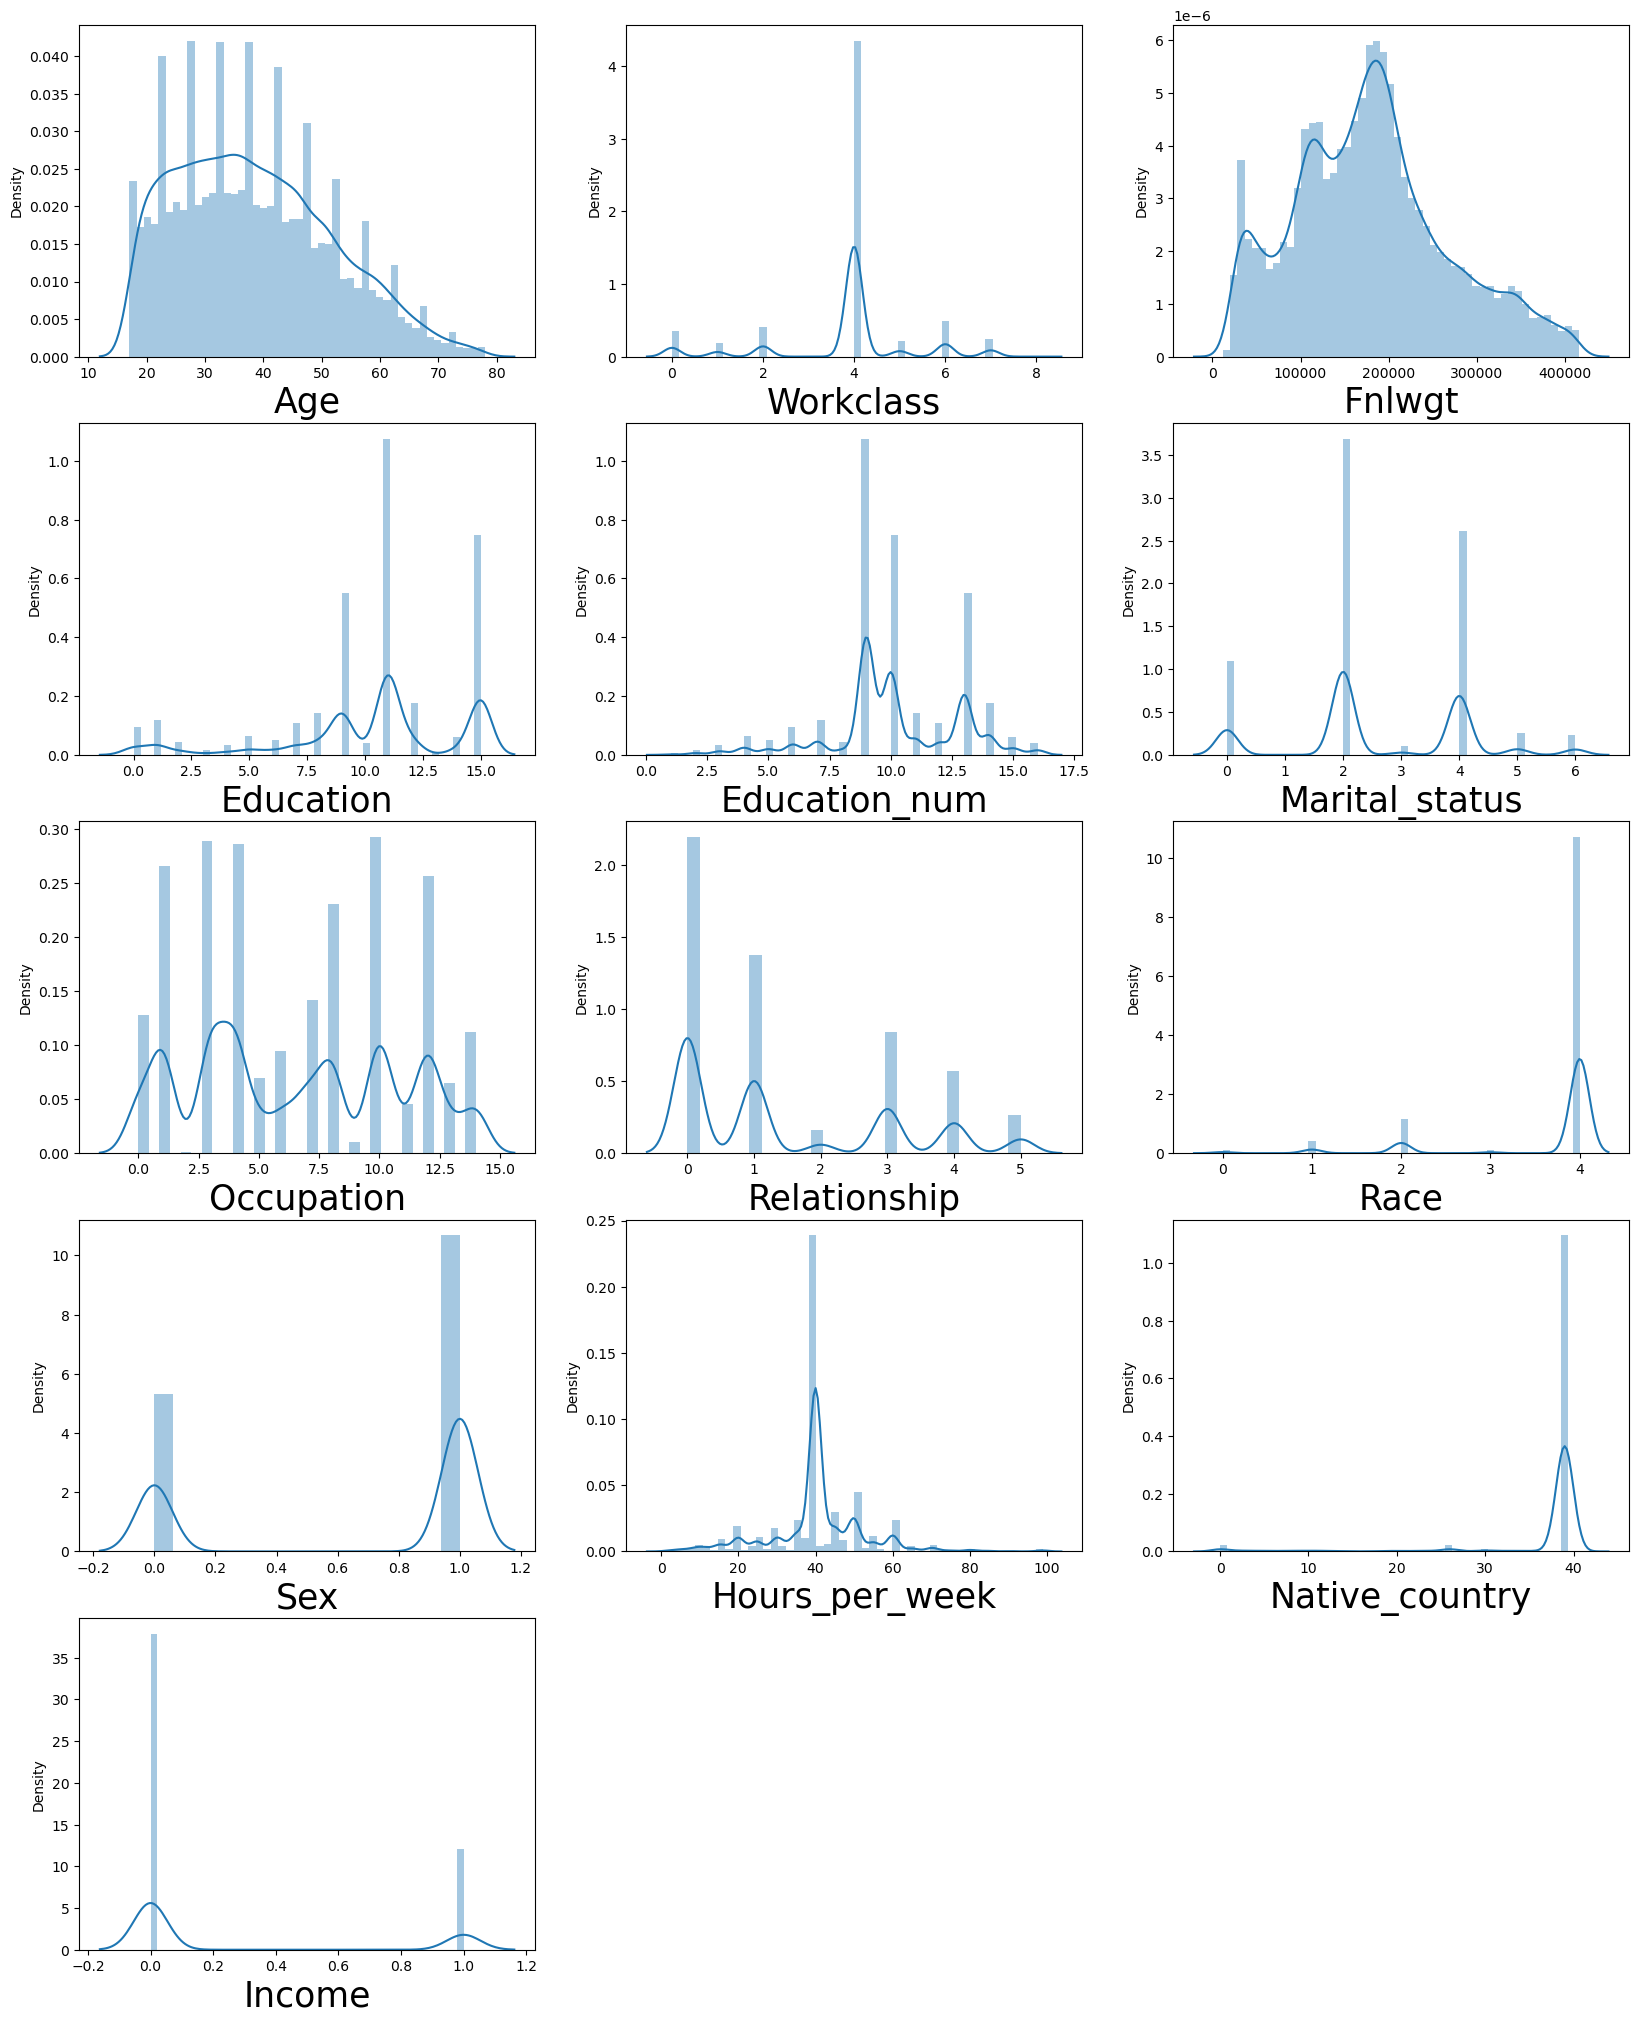

In [19]:
plt.figure(figsize=(20,25))
plot=1
for i in data.columns:
    if plot<=15:
        ax=plt.subplot(5,3,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=25)
    plot+=1
plt.show()

In [20]:
x=data.drop(columns=['Education_num','Income'])
y=data.Income

In [21]:
x.shape

(31426, 11)

In [22]:
y.shape

(31426,)

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [24]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.863157,1.464724,-1.103505,-0.340344,-0.401730,-0.609852,-0.899497,0.389878,0.706229,-2.233266,0.288227
1,-0.036259,0.087372,0.410992,0.177731,-1.731143,-0.136771,-0.277753,0.389878,0.706229,-0.041898,0.288227
2,1.088012,0.087372,0.629294,-2.412641,-0.401730,-0.136771,-0.899497,-1.966109,0.706229,-0.041898,0.288227
3,-0.785773,0.087372,1.815943,-0.340344,-0.401730,0.809390,2.209224,-1.966109,-1.415970,-0.041898,-4.066428
4,-0.111211,0.087372,1.199924,0.436768,-0.401730,-0.609852,2.209224,0.389878,-1.415970,-0.041898,0.288227


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
vif=pd.DataFrame()
vif['columns']=x.columns
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,columns,values
0,Age,1.160819
1,Workclass,1.090552
2,Fnlwgt,1.008529
3,Education,1.012033
4,Marital_status,1.133795
5,Occupation,1.074843
6,Relationship,1.679503
7,Race,1.039703
8,Sex,1.558438
9,Hours_per_week,1.122928


In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=65)


In [30]:
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred=lr.predict(x_test)

In [34]:
lr.score(x_train,y_train)

0.7638847638847639

In [35]:
lr.score(x_test,y_test)

0.7630138729795087

In [38]:
accuracy_score(y_test,y_pred)

0.7630138729795087